In [ ]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

In [ ]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)



In [ ]:
# Step 2: Apply gates to demonstrate tensor product states
qc.x(0)  # Apply X gate on qubit 0 → |10>



In [ ]:
# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])



In [ ]:
# Step 4: Use AerSimulator (new standard in Qiskit 2.x)
simulator = AerSimulator()

# Transpile the circuit for the simulator
from qiskit import transpile
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()



In [ ]:
# Step 5: Display circuit and results
print("Measurement Results:", counts)
qc.draw('text')
plt.show()
plot_histogram(counts)
plt.show()

Measurement Results: {'01': 1024}


In [ ]:
%matplotlib inline


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib
import matplotlib.pyplot as plt


matplotlib.use('Agg')
import io
from PIL import Image

def show_inline(fig):
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    display(Image.open(buf))
    plt.close(fig)

sim = AerSimulator()

H on both: {'01': 254, '00': 272, '10': 242, '11': 256}


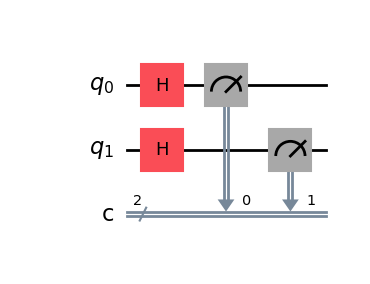

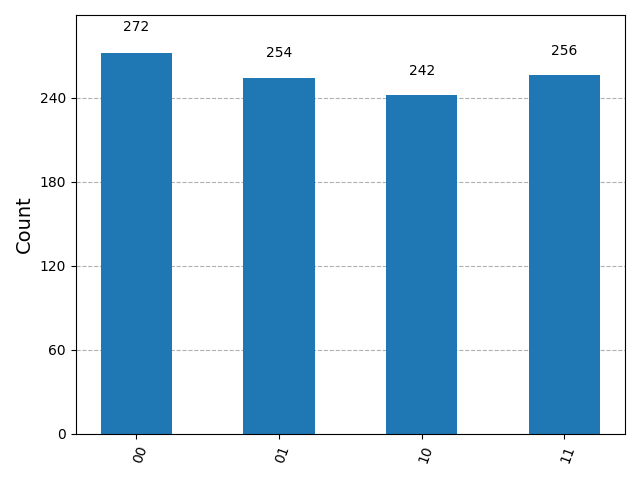

In [ ]:
# --- Hadamard on both qubits ---

qc = QuantumCircuit(2, 2)
qc.h([0, 1])
qc.measure([0, 1], [0, 1])
res = sim.run(transpile(qc, sim), shots=1024).result()
print("H on both:", res.get_counts())
show_inline(qc.draw('mpl'))
show_inline(plot_histogram(res.get_counts()))

# Pattern: nearly equal probabilities for 00, 01, 10, 11

X on second qubit: {'10': 1024}


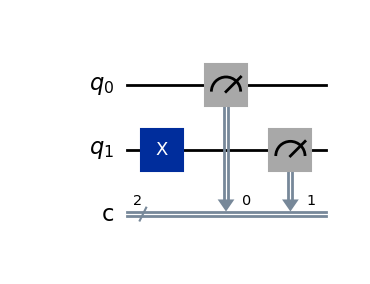

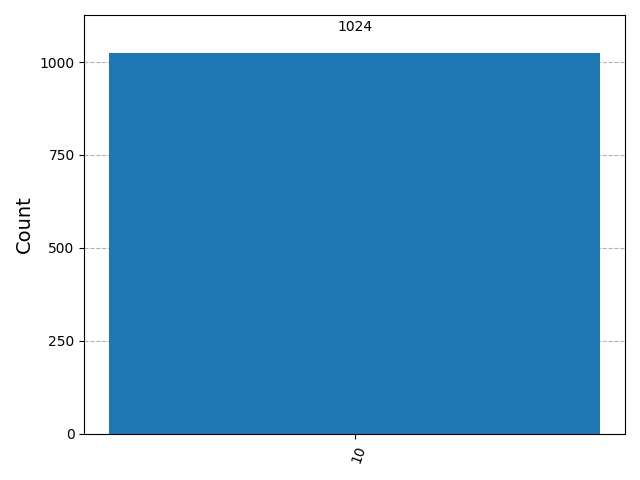

In [ ]:
# --- Swap qubit roles ---

qc = QuantumCircuit(2, 2)
qc.x(1)
qc.measure([0, 1], [0, 1])
res = sim.run(transpile(qc, sim), shots=1024).result()
print("X on second qubit:", res.get_counts())
show_inline(qc.draw('mpl'))
show_inline(plot_histogram(res.get_counts()))

# Observation: output now 10 instead of 01


H + CNOT: {'11': 531, '00': 493}


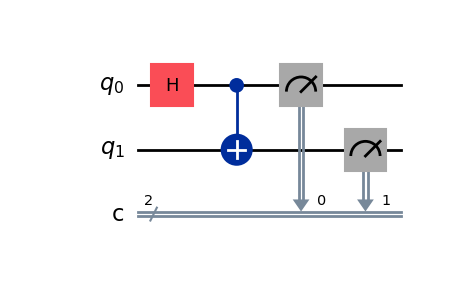

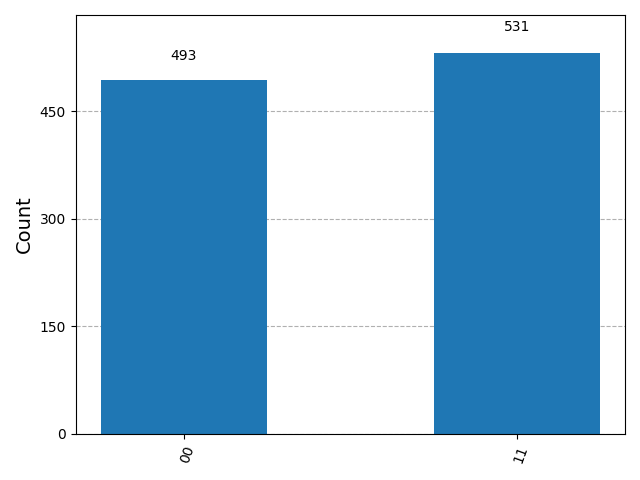

In [ ]:
# --- Add CNOT after Hadamard ---

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
res = sim.run(transpile(qc, sim), shots=1024).result()
print("H + CNOT:", res.get_counts())
show_inline(qc.draw('mpl'))
show_inline(plot_histogram(res.get_counts()))

# Observation: only 00 and 11 appear — entangled (Bell) state

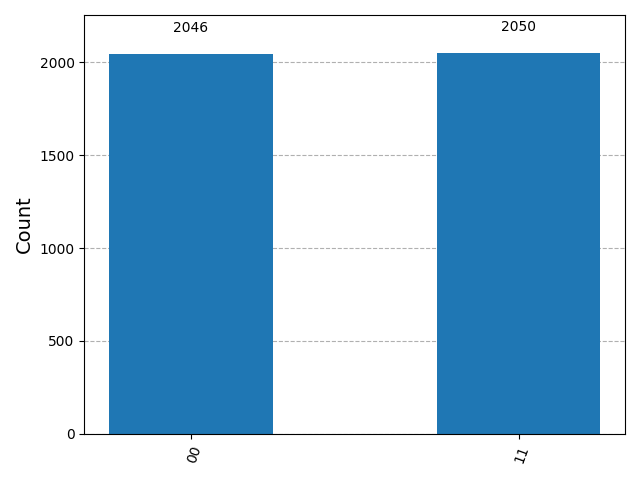

In [ ]:
# --- Increase shots to 4096 ---

res = sim.run(transpile(qc, sim), shots=4096).result()
show_inline(plot_histogram(res.get_counts()))

# Observation: distribution becomes smoother and more stable

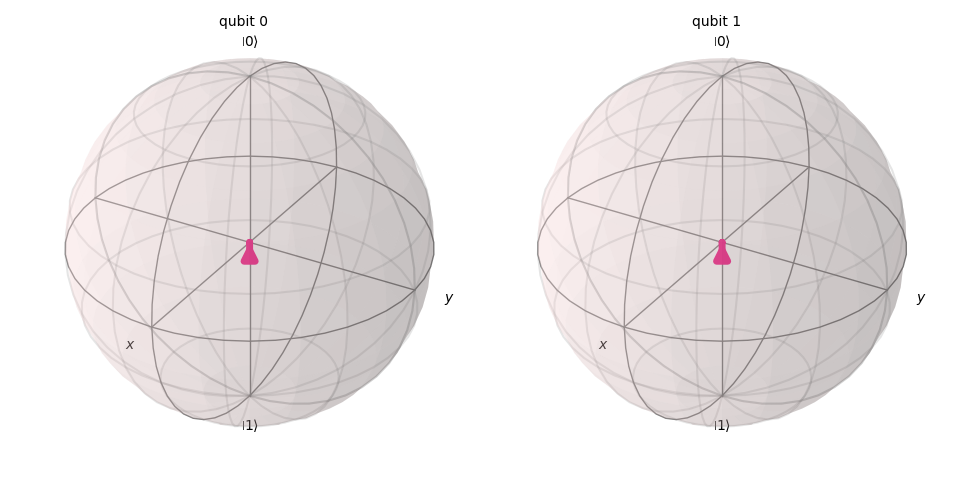

In [ ]:
# --- Bloch sphere visualization ---

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
# IMPORTANT: use save_statevector()
state_sim = AerSimulator()
qc.save_statevector()
res = state_sim.run(transpile(qc, state_sim)).result()
state = res.data(0)['statevector']
show_inline(plot_bloch_multivector(state))

# Observation: Bloch spheres show correlated orientation — entanglement